In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg
import glob
import json
import os

import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg
import glob
import json
import os
import torch
import torch.nn as nn
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, sampler
import pandas as pd
import copy

In [56]:
lbls = ["segm", "globules", "milia_like_cyst", "negative_network", "pigment_network", "streaks"]

In [57]:
path = "/Users/nduginets/PycharmProjects/master-diploma/GAN_to_box/test_data/isic_2018_boxes.csv"
frame = pd.read_csv(path)

In [58]:
indexes = [i for i in range(0, 15)]
indexes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [59]:
def fetch_histogram(frame, indexes, label_name):
    result_hist = []
    for position in indexes:
        label_offset_x = label_name + "_x_" + str(position)
        label_offset_y = label_name + "_y_" + str(position)
        for idx in frame.index:
            # print(label_offset_y, label_offset_x, idx)
            if frame.at[idx, label_offset_x] != 0\
                    and frame.at[idx, label_offset_y] != 0:
                result_hist.append(position)
    return result_hist

s [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<Figure size 432x288 with 0 Axes>

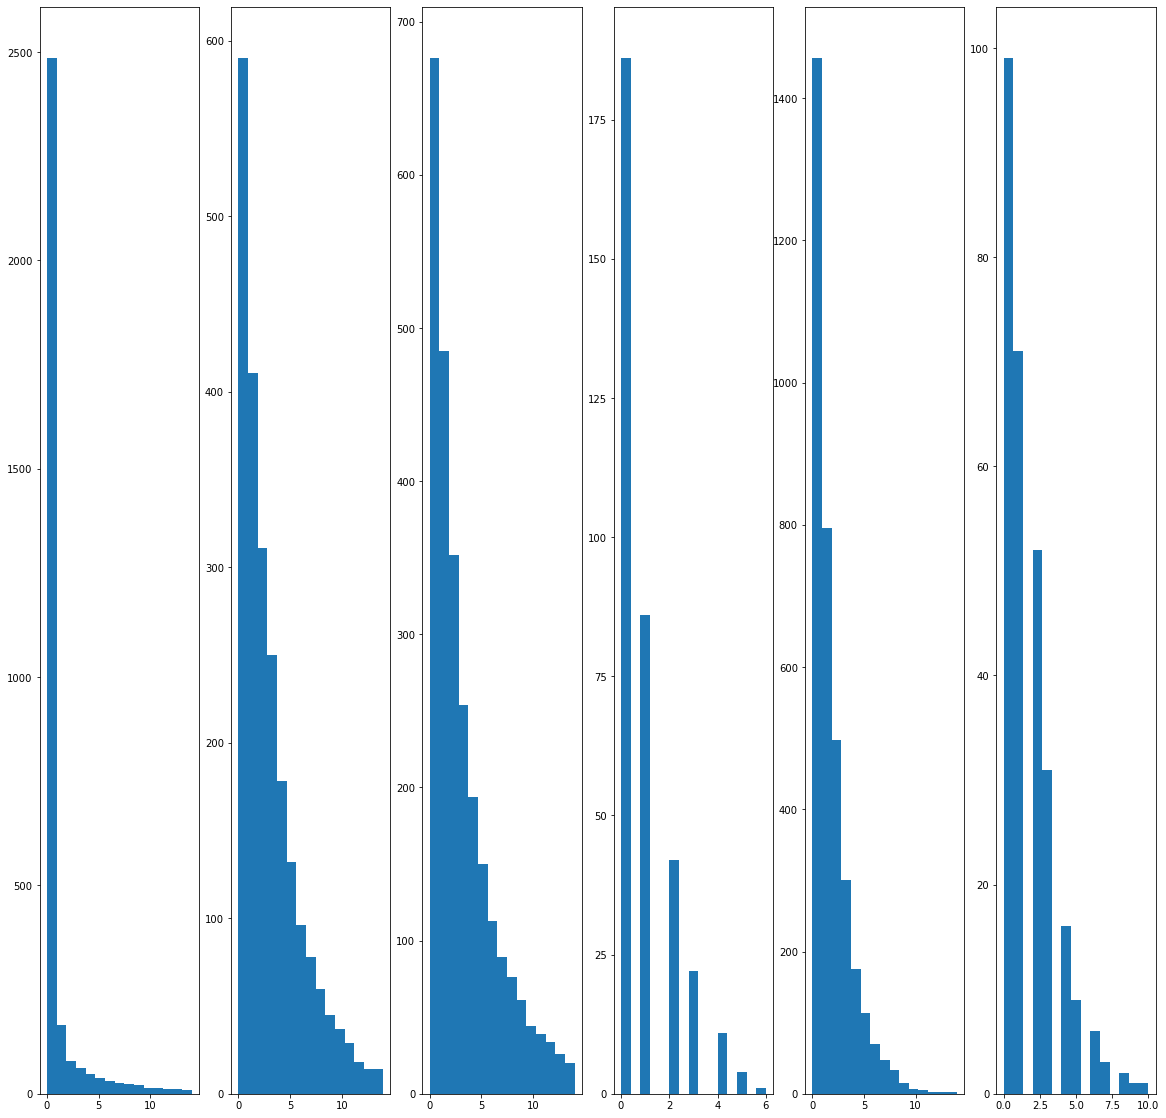

In [60]:
def draw_hist():
    plt.clf()
    fig, plots = plt.subplots(nrows=1, ncols=len(lbls), figsize = (20,20))
    for idx, l in enumerate(lbls):
        hist_res = fetch_histogram(frame, indexes, l)
        print(l[0], hist_res)
        plots[idx].hist(hist_res, bins=15)
        plots[idx].set_label(l)
    plt.show()
draw_hist()